In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')


In [103]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Reading data

data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [105]:
#List of columns in the dataframe 

list(data)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [106]:
data.shape

(99999, 226)

###### There are 99999 rows and 226 columns in the data

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [108]:
# lets have a look at statistical data

data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [109]:
# creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [110]:
# lets check if we have missed any column

print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == data.shape[1])

True


In [111]:
# looking for missing values
(data.isnull().sum()*100/data.shape[0]).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
                              ...    
last_day_rch_amt_6           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_8           0.000000
last_day_rch_amt_9           0.000000
mobile_number                0.000000
Length: 226, dtype: float64

#### Imputing missing values with 0

In [112]:
# some recharge columns have minimum value of 1
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [113]:
# we can see that the recharge date and the recharge value are missing together which means the customer didn't recharge
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In recharge variables where minumum value is 1, we can impute missing values with 0 as it means customer didn't recharge their numbers in that month.



In [114]:
# creating a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [115]:
# imputing missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [116]:
# let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(data[zero_impute].isnull().sum()*100/data.shape[1])

# summary
print("\n\nSummary statistics\n")
print(data[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [117]:
# dropping id and date columns
print("Shape before dropping: ", data.shape)
data = data.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", data.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


#### Replacing NaN values in categorical variables

In [118]:
# replace missing values with '-1' in categorical columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

#### Dropping variables with more than a given threshold of missing values

In [119]:
initial_cols = data.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [120]:
# dropping columns
data = data.loc[:, include_cols]

dropped_cols = data.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [121]:
# imputing the respective null columns as 0. 
data[data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = data[data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [122]:
# Filter high-value customers
# Observing recharge columns
rch_df=data.columns[data.columns.str.contains('rech_amt|rech_data')]
rch_df

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [123]:
# null values in recharge columns
100*data.loc[:,rch_df].isnull().sum()/len(data)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [129]:
# let's add a new derived variable total revenue from customer
data['Rev_Cust']=data['arpu_6']+data['arpu_7']+data['arpu_8']

In [130]:
# calculate total 3g usage of customer
data['vol_3g']=data['vol_3g_mb_6']+data['vol_3g_mb_7']+data['vol_3g_mb_8']

In [135]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

In [136]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [137]:
# average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [138]:
# total value based cost
data['vbc']=data['aug_vbc_3g']+data['jun_vbc_3g']+data['jul_vbc_3g']

In [139]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 478.0


#### Filter high-value customers


In [140]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
high_val_cust = data.loc[data.av_amt_data_6_7 > data.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(29953, 204)

In [141]:
# deleting variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

(29953, 199)

#### Deriving churn

In [142]:
#  calculating total incoming and outgoing minutes of usage
high_val_cust['total_calls_mou_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9

In [143]:
# calculating 2g and 3g data consumption
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

Tagging churners and removing attributes of the churn phase

The attributes we need to use to tag churners are:

.total_ic_mou_9

.total_og_mou_9

.vol_2g_mb_9

.vol_3g_mb_9

In [144]:
# Those who have not used either calls or internet in  September are churned customers

# Let's denote 0 as not churn and  1 as churn

high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [145]:
high_val_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]


,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29948,0,391.63,64.21,0.00,0.00
29949,0,149.26,14.44,723.41,232.56
29950,0,547.11,1095.24,9.14,941.48
29951,0,265.84,182.16,0.05,393.34


After tagging churners, we will remove all the attributes corresponding to the churn phase
(all attributes having ‘ _9’, etc. in their names)

In [146]:
month_9_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'total_calls_mou_9', 'total_internet_mb_9'],
      dtype='object')

In [147]:
high_val_cust = high_val_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)


In [148]:
# changing data type to category
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


Calculating difference between 8th and previous months


In [149]:
high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)

high_val_cust['total_rech_data_diff'] = high_val_cust.total_rech_data_8 - ((high_val_cust.total_rech_data_6 + high_val_cust.total_rech_data_7)/2)

high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)

high_val_cust['av_rech_amt_data_diff'] = high_val_cust.av_rech_amt_data_8 - ((high_val_cust.av_rech_amt_data_6 + high_val_cust.av_rech_amt_data_7)/2)

high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

In [150]:
high_val_cust['total_og_mou_diff'].describe()


count    29953.000000
mean       -67.461292
std        502.520398
min      -7213.410000
25%       -167.865000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [151]:
col_9 =  high_val_cust.columns[high_val_cust.columns.str.contains('_9')]


In [152]:
# extract all names that end with 9
col_9_names = high_val_cust.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]

In [153]:
# change column types
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [154]:
#Checking whether there are any null values left in the dataset
col_list = list(high_val_cust)
null = []
for i in high_val_cust.isnull().sum()*100/high_val_cust.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
data_null = pd.DataFrame(data)
data_null[data_null['% null'] != 0]

,columns,% null


There are no null values left in the dataframe

In [155]:
#Checking Numerical and Non-Numerical columns

NonNumCols = []
NumCols = []

for col in list(high_val_cust):
    if high_val_cust[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
        
print('No of Numerical columns:' ,len(NumCols))
print('No of Non-Numerical columns:', len(NonNumCols))

No of Numerical columns: 223
No of Non-Numerical columns: 0


In [156]:
high_val_cust.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.0,0.0,0.0,558.820058,561.160547,508.890301,467.446183,260.900880,268.051744,234.345252,...,-0.013859,-13.458777,-1.813625,-76.316346,-10.590458,-0.139752,-6.470704,-13.138966,-19.944442,-5.774308
std,0.0,0.0,0.0,460.868223,480.028497,502.136278,501.837624,459.853278,480.303238,458.751242,...,0.174524,221.991875,6.755857,418.516455,136.974352,2.215405,78.380008,148.269988,256.223128,625.226058
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,...,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,0.0,0.0,0.0,310.142000,310.071000,231.615000,189.750000,17.090000,16.040000,10.440000,...,0.000000,-67.220000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.155000,-2.395000
50%,0.0,0.0,0.0,482.354000,481.496000,427.604000,388.093000,84.640000,82.830000,65.660000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,700.240000,698.829000,661.753000,626.637000,290.490000,290.540000,240.630000,...,0.000000,44.295000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,...,4.450000,3485.370000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


From the data above we can know that there are outliers present in the dataset

In [157]:
high_val_cust.shape

(29953, 223)

In [158]:
high_val_cust.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.0,0.0,0.0,558.820058,561.160547,508.890301,467.446183,260.900880,268.051744,234.345252,...,-0.013859,-13.458777,-1.813625,-76.316346,-10.590458,-0.139752,-6.470704,-13.138966,-19.944442,-5.774308
std,0.0,0.0,0.0,460.868223,480.028497,502.136278,501.837624,459.853278,480.303238,458.751242,...,0.174524,221.991875,6.755857,418.516455,136.974352,2.215405,78.380008,148.269988,256.223128,625.226058
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,...,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
1%,0.0,0.0,0.0,1.272400,0.726000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.380000,-692.892600,-22.500000,-1207.920000,-500.000000,-7.000000,-252.000000,-449.000000,-854.958200,-1727.872000
10%,0.0,0.0,0.0,171.795000,177.973000,84.302800,23.000000,0.710000,0.580000,0.000000,...,-0.130000,-174.505000,-8.000000,-506.000000,-109.500000,-2.000000,-88.500000,-152.000000,-168.475000,-384.172000
25%,0.0,0.0,0.0,310.142000,310.071000,231.615000,189.750000,17.090000,16.040000,10.440000,...,0.000000,-67.220000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.155000,-2.395000
50%,0.0,0.0,0.0,482.354000,481.496000,427.604000,388.093000,84.640000,82.830000,65.660000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,700.240000,698.829000,661.753000,626.637000,290.490000,290.540000,240.630000,...,0.000000,44.295000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
90%,0.0,0.0,0.0,994.408600,996.170600,977.546400,935.926600,754.560000,784.828000,666.266000,...,0.000000,141.817000,4.500000,301.000000,71.000000,1.500000,50.000000,116.000000,68.267000,312.172000


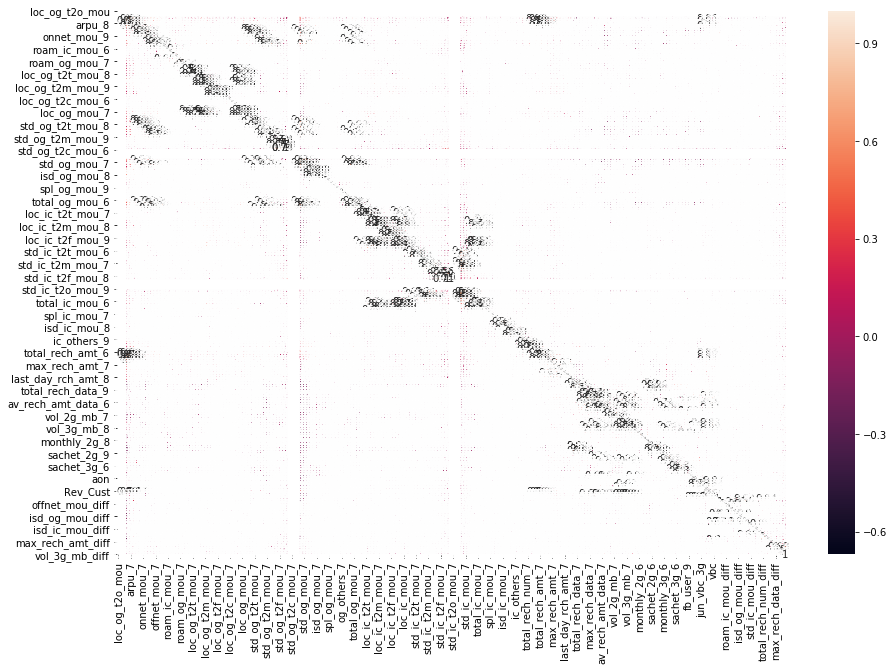

In [63]:
#Correlations
correlation = high_val_cust.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True)
plt.show()

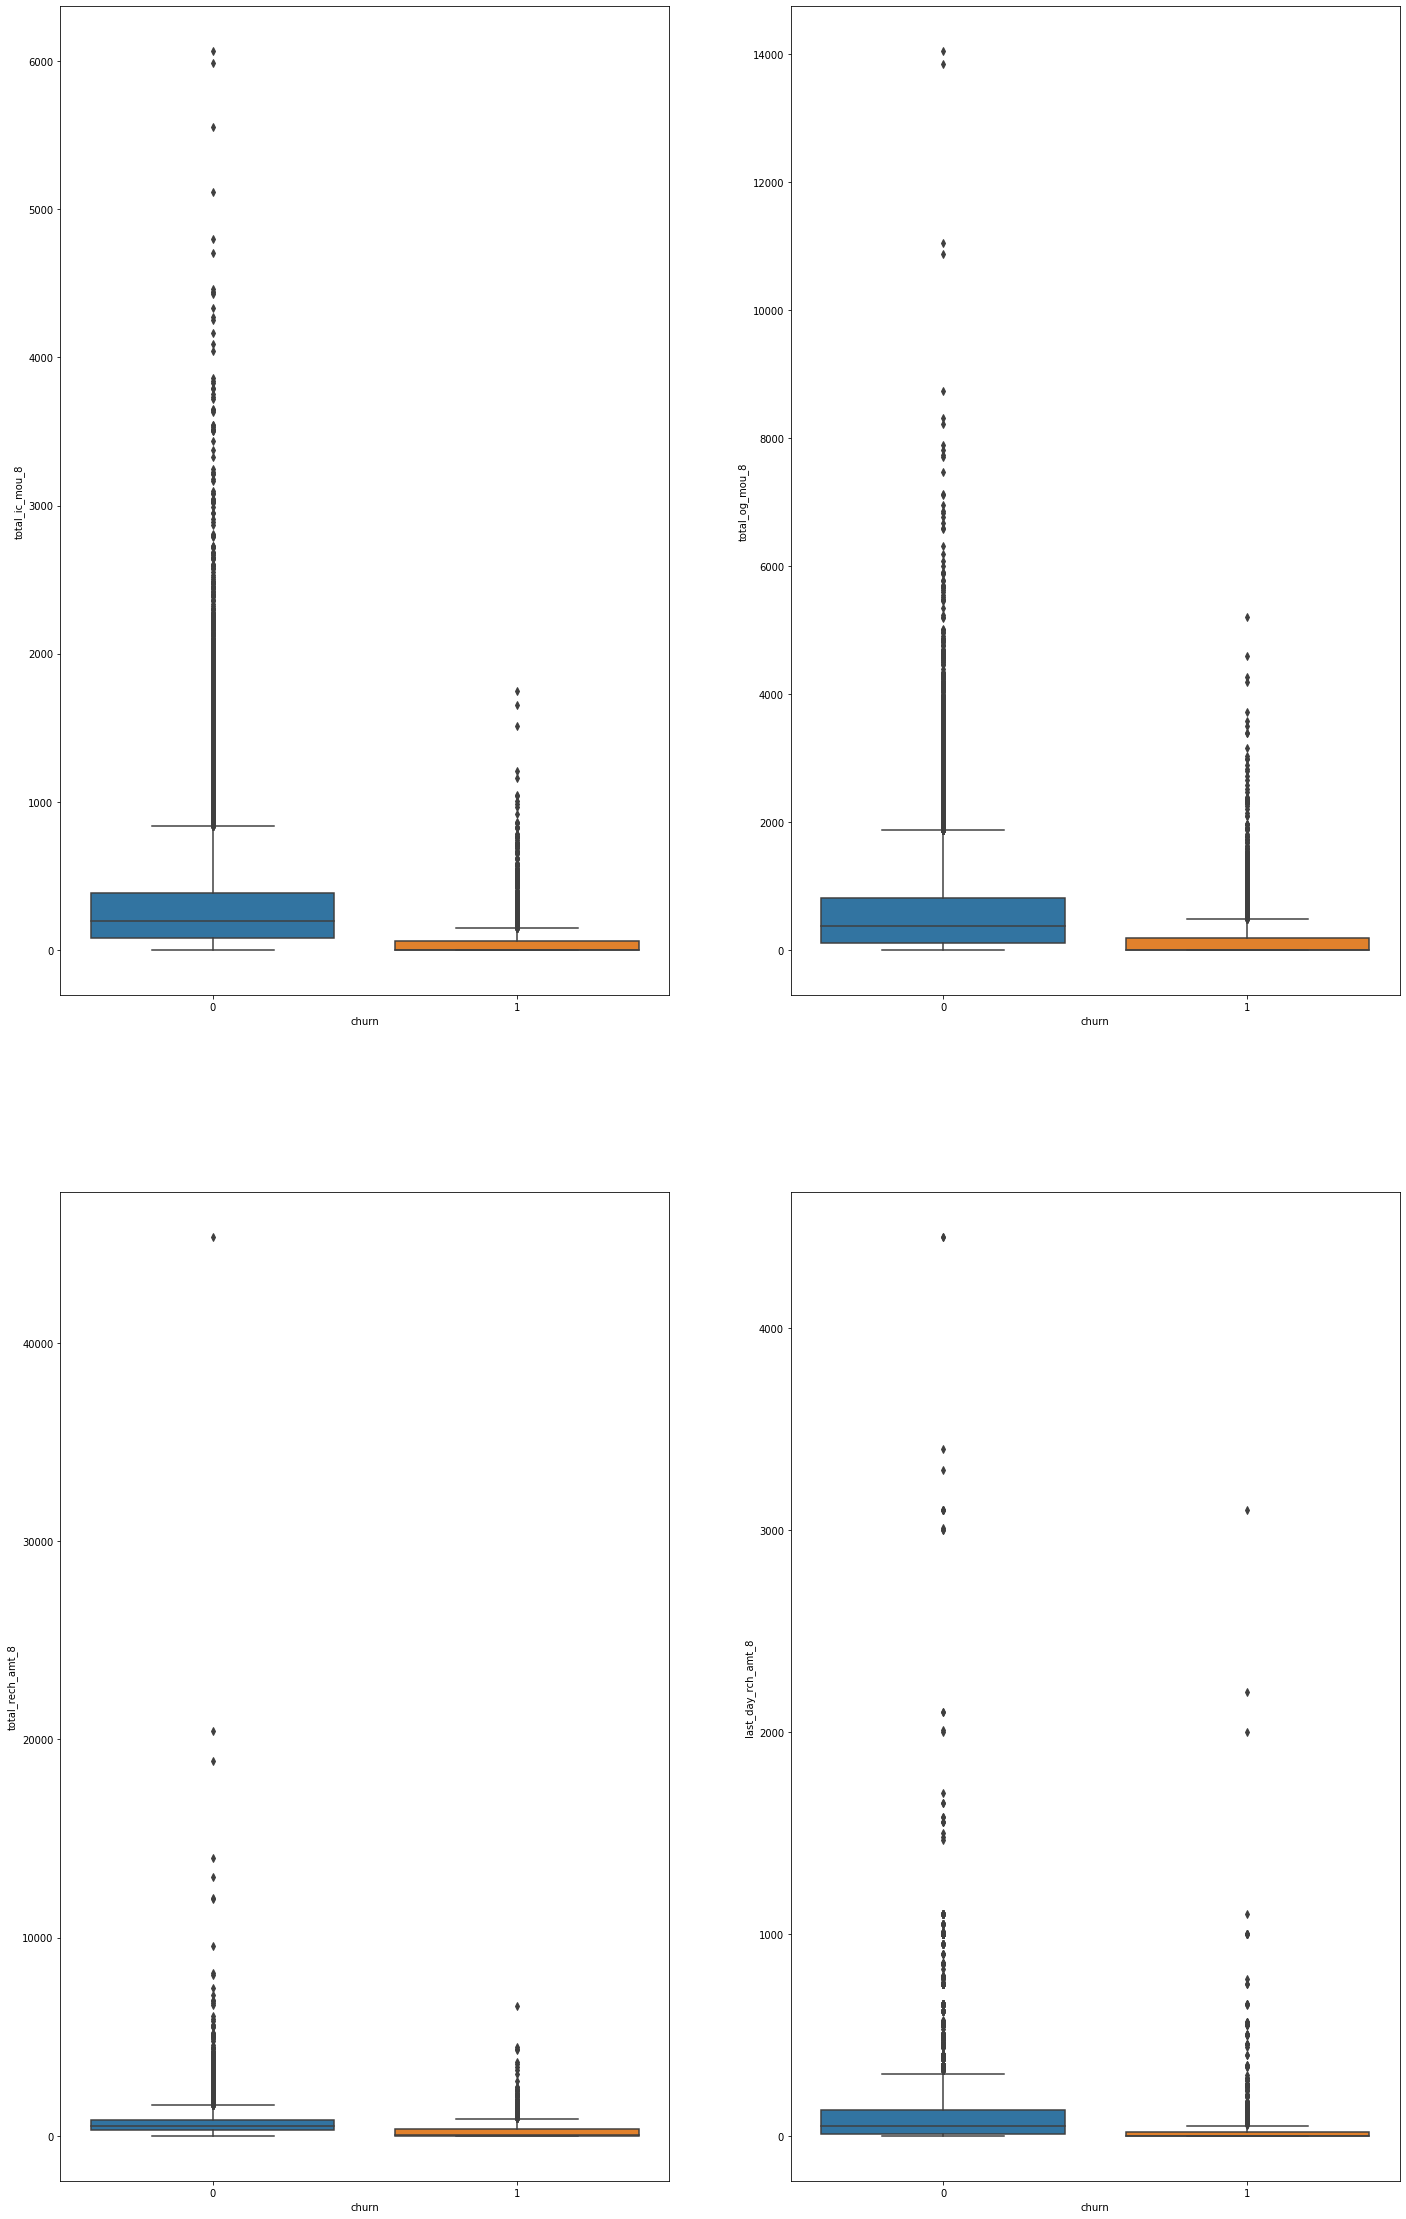

In [159]:
#Some important features
fig = plt.figure(figsize=(24,40))

plt.subplot(2,2,1)
sns.boxplot(x='churn', y='total_ic_mou_8', data = high_val_cust)

plt.subplot(2,2,2)
sns.boxplot(x='churn', y='total_og_mou_8', data = high_val_cust)

plt.subplot(2,2,3)
sns.boxplot(x='churn', y='total_rech_amt_8', data = high_val_cust)

plt.subplot(2,2,4)
sns.boxplot(x='churn', y='last_day_rch_amt_8', data = high_val_cust)
plt.show()

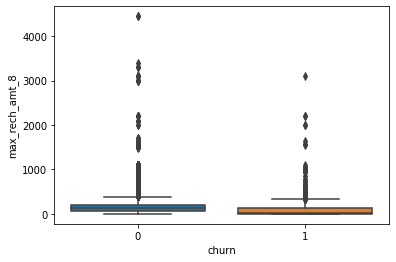

In [160]:
sns.boxplot(x='churn', y='max_rech_amt_8', data = high_val_cust)

plt.show()


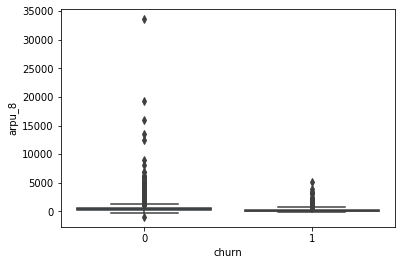

In [69]:
sns.boxplot(x='churn', y='arpu_8', data = high_val_cust)
plt.show()

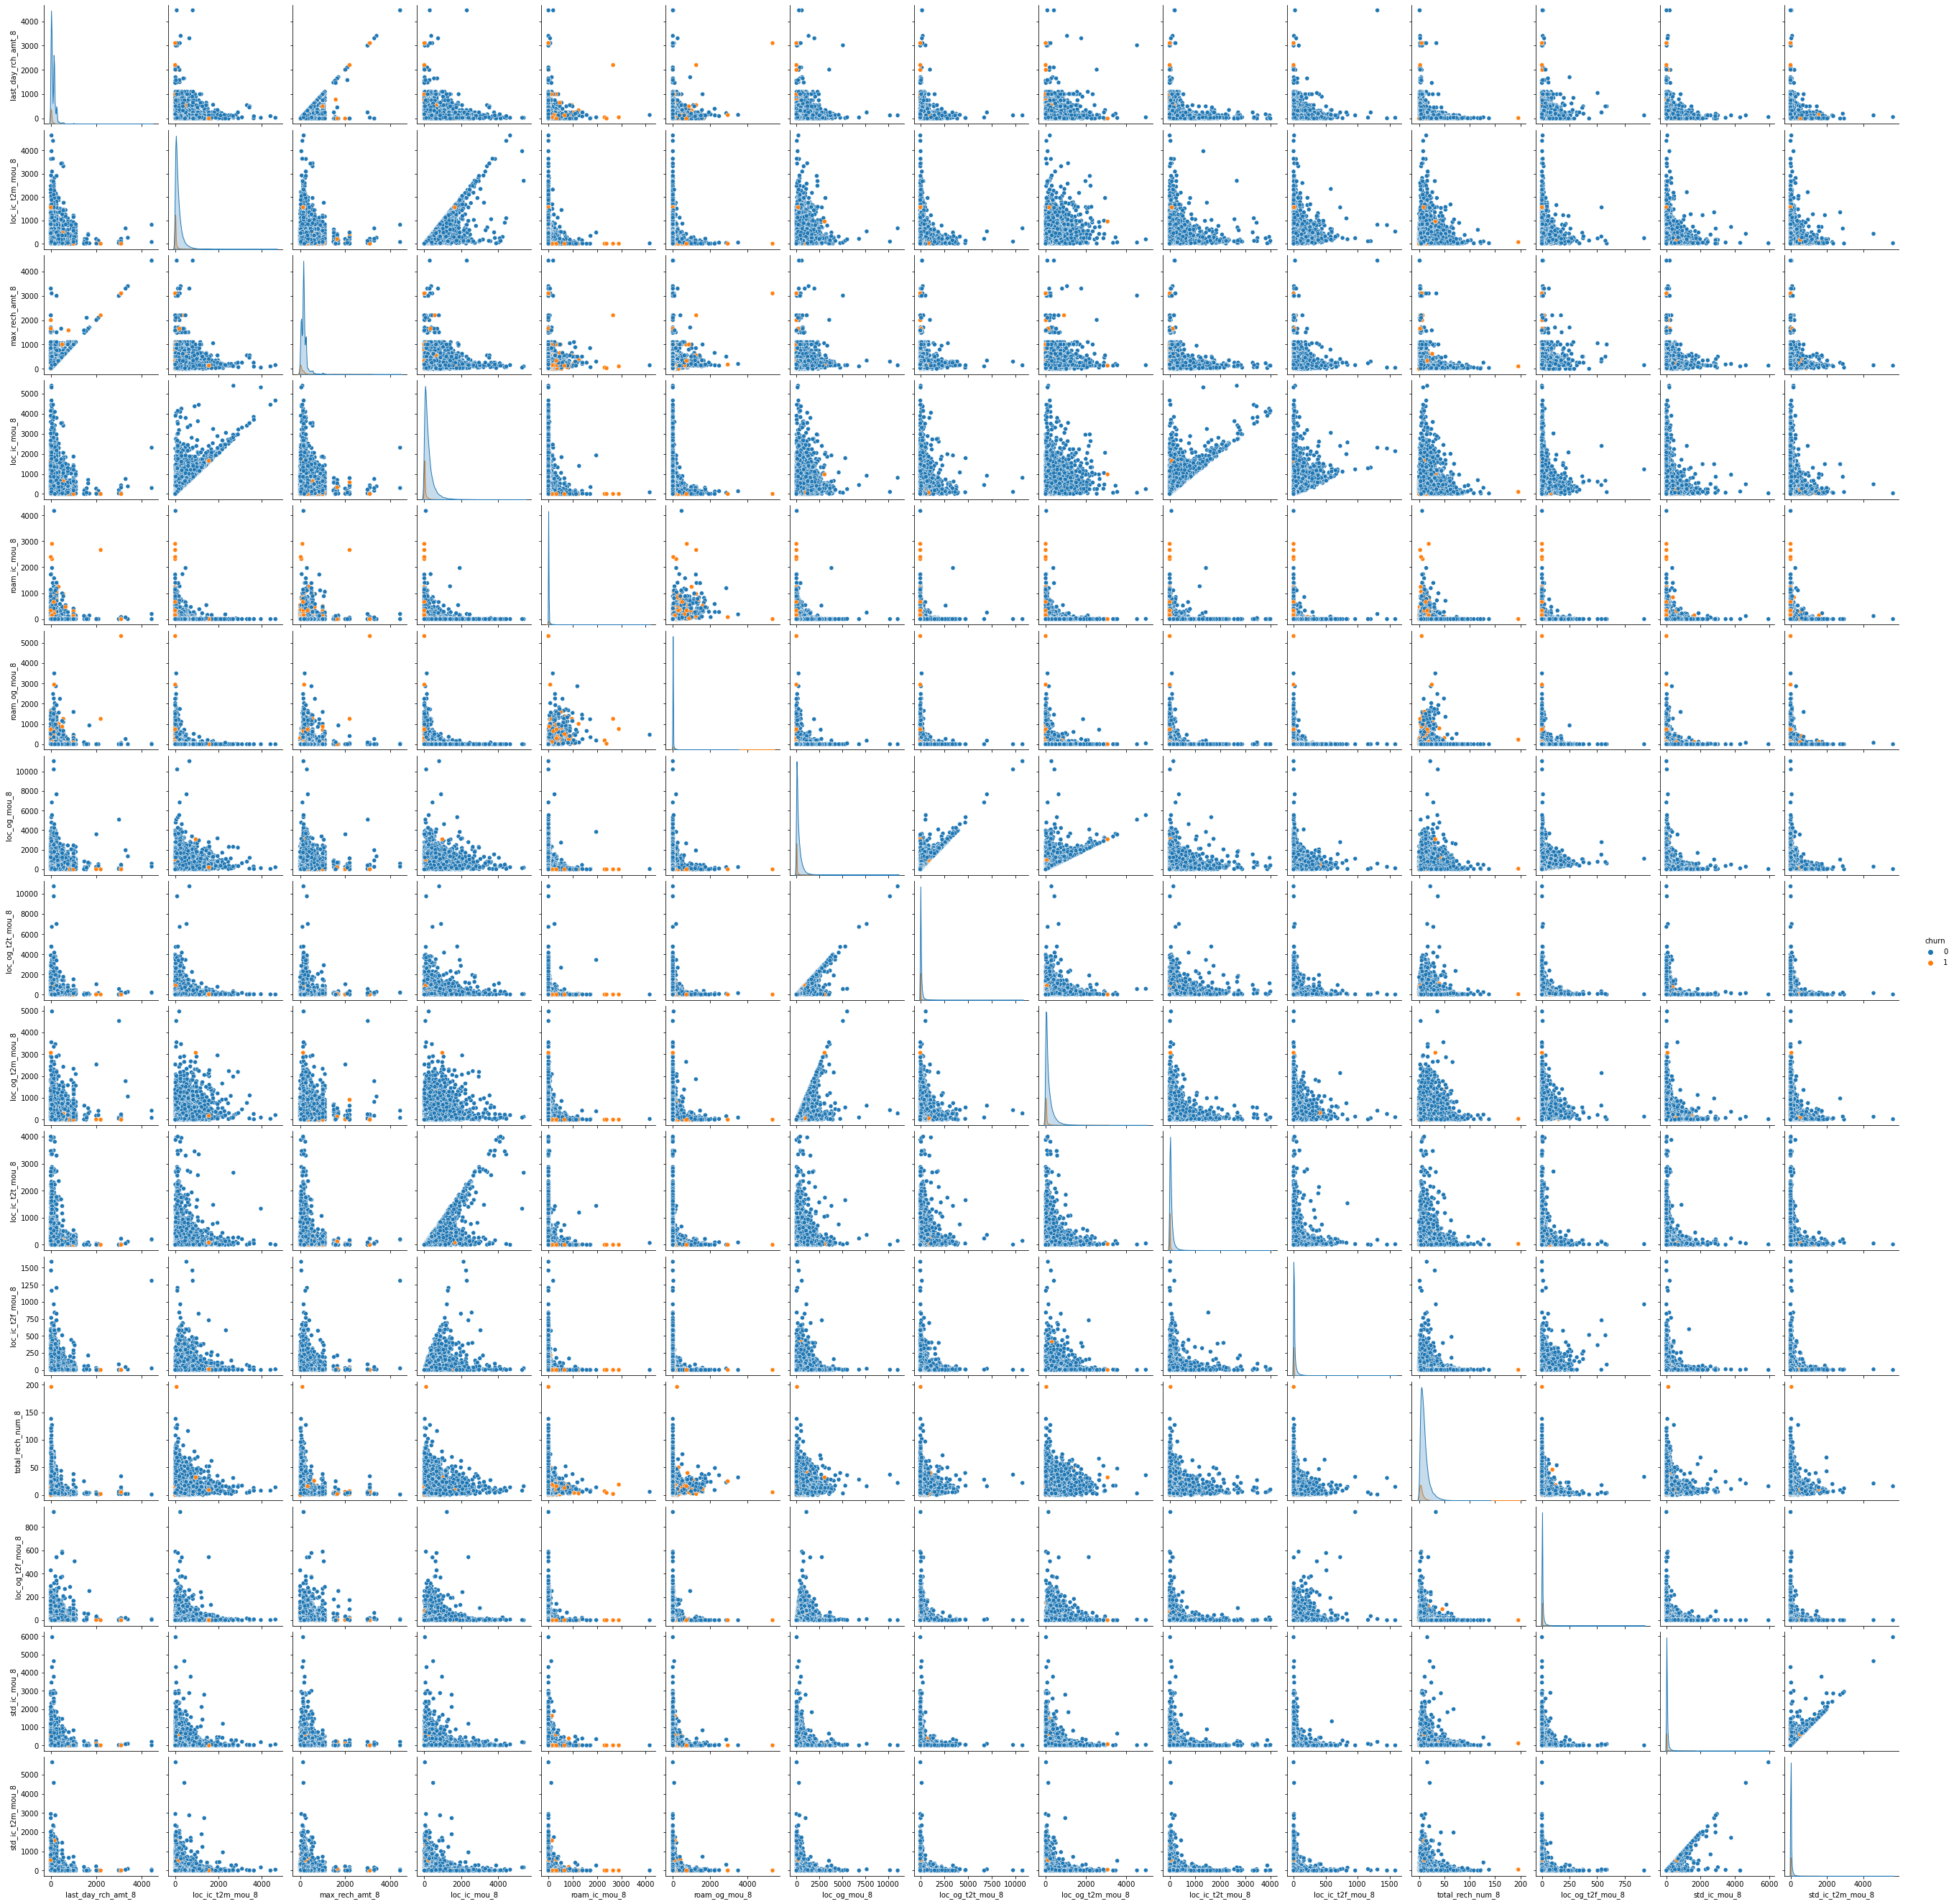

In [51]:
sns.pairplot(data=high_val_cust[['last_day_rch_amt_8','loc_ic_t2m_mou_8','max_rech_amt_8', 'loc_ic_mou_8',
                           'roam_ic_mou_8','roam_og_mou_8', 'loc_og_mou_8',
                           'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
                           'total_rech_num_8', 'loc_og_t2f_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8', 'churn']],
             hue='churn')
plt.show()

In [161]:
# change churn to numeric
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

## Decision Tree

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [163]:
X_train.shape, X_test.shape

((20967, 222), (8986, 222))

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=10)

In [166]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [167]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [168]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8305
           1       1.00      1.00      1.00       681

    accuracy                           1.00      8986
   macro avg       1.00      1.00      1.00      8986
weighted avg       1.00      1.00      1.00      8986



In [170]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

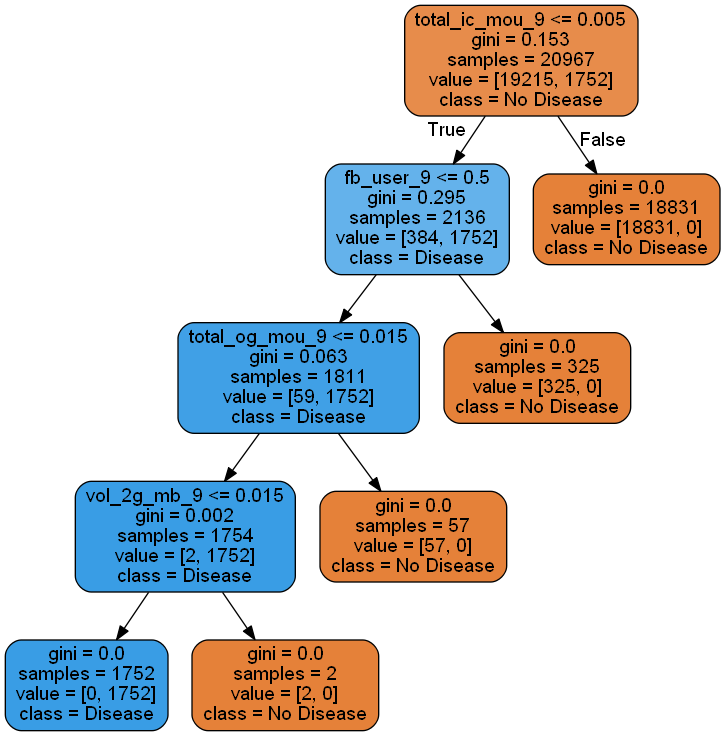

In [171]:
dot_data = StringIO()  

export_graphviz(dt_base, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Ensemble

In [173]:
dt = DecisionTreeClassifier(random_state=42)

## Hyperparameter tuning

In [176]:
from sklearn.model_selection import GridSearchCV

In [174]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [177]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [178]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   31.6s finished


Wall time: 32.4 s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
          

In [179]:
grid_search.best_score_

0.999856918014022

In [180]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

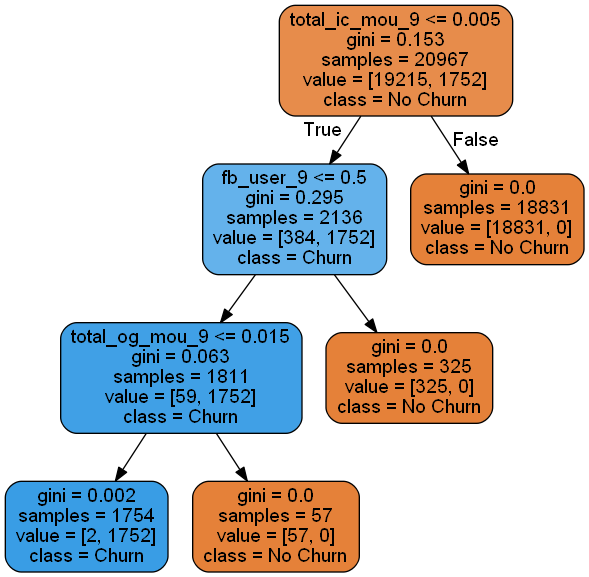

In [181]:
dot_data = StringIO()  

export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Scaling

In [183]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()



In [184]:
X = high_val_cust.drop(['churn'], axis=1)

y = high_val_cust['churn']

In [185]:
X_scaled = scaler.fit_transform(X)

In [187]:
h=X.columns

In [188]:
X[h]=scaler.fit_transform(X[h])

In [189]:
X

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,0.081898,0.059980,0.033622,0.047183,0.000000,0.000000,0.000000,...,0.785335,0.621562,0.525180,0.323793,0.432533,0.367470,0.490772,0.658887,0.369513,0.441567
1,0.0,0.0,0.0,0.110967,0.090525,0.119378,0.058948,0.007841,0.006703,0.004863,...,0.780270,0.603189,0.537770,0.441569,0.489294,0.367470,0.490772,0.658887,0.370292,0.441836
2,0.0,0.0,0.0,0.087944,0.067446,0.031406,0.050762,0.056081,0.043030,0.003262,...,0.785335,0.615573,0.508993,0.307638,0.419313,0.391566,0.470433,0.655202,0.356391,0.428868
3,0.0,0.0,0.0,0.092470,0.070285,0.045915,0.060879,0.013883,0.016194,0.007918,...,0.785335,0.630927,0.541367,0.330038,0.432533,0.367470,0.490772,0.658887,0.370292,0.441836
4,0.0,0.0,0.0,0.077795,0.059417,0.038063,0.066601,0.006637,0.006210,0.003123,...,0.785335,0.634792,0.530576,0.336331,0.445394,0.379518,0.524482,0.676273,0.370274,0.467178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,0.0,0.0,0.0,0.088131,0.061073,0.038832,0.048976,0.010666,0.003560,0.009601,...,0.782200,0.621931,0.530576,0.335767,0.432533,0.367470,0.490772,0.658887,0.372959,0.454960
29949,0.0,0.0,0.0,0.086273,0.059661,0.030865,0.054628,0.057477,0.022289,0.000531,...,0.774964,0.620559,0.530576,0.318744,0.422474,0.397590,0.462524,0.655013,0.309014,0.441836
29950,0.0,0.0,0.0,0.096822,0.066450,0.043786,0.053235,0.109362,0.067342,0.072114,...,0.785335,0.627333,0.516187,0.287703,0.340135,0.367470,0.494350,0.660682,0.368817,0.441626
29951,0.0,0.0,0.0,0.085738,0.068003,0.039081,0.059772,0.027097,0.021386,0.000229,...,0.785335,0.680441,0.519784,0.328113,0.440006,0.373494,0.519774,0.673439,0.370353,0.465807


### Train-Test Split

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20967, 222)
y_train shape: (20967,)
X_test shape: (8986, 222)
y_test shape: (8986,)


In [193]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20785
Model Family:                Binomial   Df Model:                          181
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Jun 2021   Deviance:                          nan
Time:                        23:44:30   Pearson chi2:                 1.29e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.106e+18   1.21e+11   -3.4e+07      0.000   -4.11e+18   -4.11e+18
loc_og_t2o_mou        -2.785e+09     96.870  -2.87e+07      0.000   -2.78e+09   -2.78e+09
std_og_t2o_mou        -1.799e+10    168.062  -1.07e+08      0.000    -1.8e+10    -1.8e+10
loc_ic_t2o_mou          1.28e+09     69.899   1.83e+07      0.000    1.28e+09    1.28e+09
arpu_6                -2.578e+17    7.6e+09  -3.39e+07      0.000   -2.58e+17   -2.58e+17
arpu_7                -3.205e+17   9.42e+09   -3.4e+07      0.000    -3.2e+17    -3.2e+17
arpu_8                 4.109e+17   1.21e+10    3.4e+07      0.000    4.11e+17    4.11e+17
arpu_9                -4.566e+14   1.67e+08  -2.74e+06      0.000   -4.57e+14   -4.57e+14
onnet_mou_6           -2.795e+17   8.39e+09  -3.33e+07      0.000    -2.8e+17    -2.8e+17
onnet_mou_7           -3.223e+17   9.27e+09  -3.48e+07      0.000   -3.22e+17   -3.22e+17
onnet_mou_8            8.347e+17   2.44e+10   3.42e+07      0.000    8.35e+17    8.35e+17
onnet_mou_9           -4.071e+16   8.85e+08   -4.6e+07      0.000   -4.07e+16   -4.07e+16
offnet_mou_6          -1.927e+17   5.78e+09  -3.33e+07      0.000   -1.93e+17   -1.93e+17
offnet_mou_7          -2.334e+17   6.65e+09  -3.51e+07      0.000   -2.33e+17   -2.33e+17
offnet_mou_8           6.652e+17   1.92e+10   3.46e+07      0.000    6.65e+17    6.65e+17
offnet_mou_9          -3.872e+16   8.41e+08   -4.6e+07      0.000   -3.87e+16   -3.87e+16
roam_ic_mou_6         -1.932e+17    5.7e+09  -3.39e+07      0.000   -1.93e+17   -1.93e+17
roam_ic_mou_7         -2.834e+17   8.32e+09  -3.41e+07      0.000   -2.83e+17   -2.83e+17
roam_ic_mou_8          6.193e+17   1.82e+10    3.4e+07      0.000    6.19e+17    6.19e+17
roam_ic_mou_9           -6.2e+14   3.15e+07  -1.97e+07      0.000    -6.2e+14    -6.2e+14
roam_og_mou_6         -2.943e+17   8.61e+09  -3.42e+07      0.000   -2.94e+17   -2.94e+17
roam_og_mou_7         -2.149e+17    6.4e+09  -3.36e+07      0.000   -2.15e+17   -2.15e+17
roam_og_mou_8          8.231e+17   2.43e+10   3.39e+07      0.000    8.23e+17    8.23e+17
roam_og_mou_9           1.76e+16   3.66e+08   4.81e+07      0.000    1.76e+16    1.76e+16
loc_og_t2t_mou_6      -3.189e+18   5.34e+11  -5.97e+06      0.000   -3.19e+18   -3.19e+18
loc_og_t2t_mou_7      -4.797e+18   6.15e+11   -7.8e+06      0.000    -4.8e+18    -4.8e+18
loc_og_t2t_mou_8      -2.734e+19   9.16e+11  -2.99e+07      0.000   -2.73e+19   -2.73e+19
loc_og_t2t_mou_9       3.365e+20    8.9e+11   3.78e+08      0.000    3.36e+20    3.36e+20
loc_og_t2m_mou_6      -2.343e+18   3.93e+11  -5.96e+06      0.000   -2.34e+18   -2.34e+18
loc_og_t2m_mou_7      -2.954e+18   3.79e+11   -7.8e+06      0.000   -2.95e+18   -2.95e+18
loc_og_t2m_mou_8      -1.262e+19   4.23e+11  -2.99e+07      0.000   -1.26e+19   -1.26e+19
loc_og_t2m_mou_9       

In [194]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [195]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [196]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,

In [197]:
X_train=pd.DataFrame(X_train)

In [198]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 208),
 ('std_og_t2o_mou', False, 207),
 ('loc_ic_t2o_mou', False, 206),
 ('arpu_6', False, 19),
 ('arpu_7', False, 68),
 ('arpu_8', False, 152),
 ('arpu_9', False, 28),
 ('onnet_mou_6', False, 70),
 ('onnet_mou_7', False, 112),
 ('onnet_mou_8', False, 80),
 ('onnet_mou_9', False, 4),
 ('offnet_mou_6', False, 60),
 ('offnet_mou_7', False, 36),
 ('offnet_mou_8', False, 58),
 ('offnet_mou_9', True, 1),
 ('roam_ic_mou_6', False, 25),
 ('roam_ic_mou_7', False, 38),
 ('roam_ic_mou_8', False, 53),
 ('roam_ic_mou_9', False, 15),
 ('roam_og_mou_6', False, 55),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', False, 22),
 ('roam_og_mou_9', False, 11),
 ('loc_og_t2t_mou_6', False, 168),
 ('loc_og_t2t_mou_7', False, 144),
 ('loc_og_t2t_mou_8', False, 88),
 ('loc_og_t2t_mou_9', False, 46),
 ('loc_og_t2m_mou_6', False, 137),
 ('loc_og_t2m_mou_7', False, 195),
 ('loc_og_t2m_mou_8', False, 33),
 ('loc_og_t2m_mou_9', True, 1),
 ('loc_og_t2f_mou_6', False, 180),
 ('loc_og_t2f_

In [199]:
col = X_train.columns[rfe.support_]

In [200]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=207)

In [212]:
from sklearn import metrics

### PCA

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [95]:
(high_val_cust.isnull().sum()*100/high_val_cust.shape[0]).sort_values(ascending=False)


vol_3g_mb_diff        0.0
spl_og_mou_7          0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_9        0.0
total_og_mou_8        0.0
                     ... 
last_day_rch_amt_6    0.0
max_rech_amt_9        0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
loc_og_t2o_mou        0.0
Length: 220, dtype: float64

In [96]:
# applying pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [97]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [98]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      28.70
1      46.27
2      57.47
3      66.25
4      73.28
5      79.88
6      86.11
7      91.43
8      95.11
9      97.50
10     98.97
11     99.89
12     99.98
13     99.99
14    100.00
15    100.00
dtype: float64


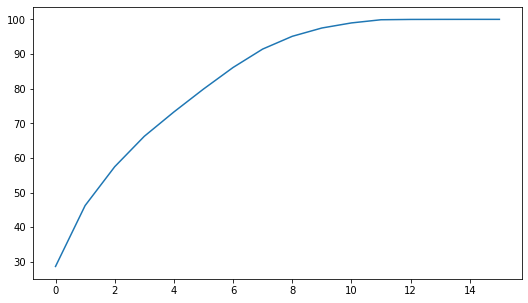

In [99]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## Important churn parameters -
1- Average revenue (ARPU) <br><br>
2- Maximun Recahrge (RECH) <br><br>
2- All kind of calls within the same operator network (OMNET)<br><br>
3- Local outgoing calls (LOC OG)<br><br>
4- volume of Data used (vol_2g vol_3g)<br><br>
The above category does not churn